In [13]:
import cv2
import numpy as np
import pandas as pd
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
movie = '130721_CCA60_RAW'
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'


In [27]:
imgs_float = np.load(MOVIE_PATH + 'np/gel.npy') # replace with your images
imgs = np.zeros(imgs_float.shape, dtype='uint8')
imgs_float = np.nan_to_num(imgs_float)
for t in range(len(imgs_float)):
    img = imgs_float[t]
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img = img.astype(np.uint8)
    imgs[t] = img

#replace nan with zero

In [36]:
import cv2
import numpy as np
y = 0
# Global variables
ix,iy, iz = -1, 0, -1
y_gap = 20
drawing = False
img_index = 0
r_size = 40 # Define your rectangle size here
coordinates = []
df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv', index_col=0)
if len(df) > 0:
    rect_data = np.empty(len(imgs), dtype=object)
    for t in range(len(imgs)):
        rect_data[t] = (df.iloc[t].values[0], df.iloc[t].values[1], df.iloc[t].values[2])

else:
    rect_data = np.empty(len(imgs), dtype=object)
    for t in range(len(imgs)):
        rect_data[t] = (0,0,0)
# Define the draw_rectangle callback function
def draw_rectangle(event, x, z, flags, param):
    global ix, iz, y, drawing, img, img_index, r_size, img_orig

    if event == cv2.EVENT_LBUTTONDOWN:
        rect_data[img_index] = (z,y,x)
        ix, iz = x, z
        #img = img_orig.copy()  # create a copy of the image

    #elif event == cv2.EVENT_MOUSEMOVE:
    #    if drawing == True:
    #        img_temp = img.copy()
    #        cv2.rectangle(img_temp, pt1=(ix, iz), pt2=(ix+r_size, iz+r_size), color=(0, 255, 0), thickness=2)
    #        cv2.imshow('image', img_temp)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False


    elif event == cv2.EVENT_MOUSEWHEEL:
        if flags > 0:  # scroll up
            if y + y_gap < imgs.shape[2]:
                y+= y_gap  # cycle through images

        else:  # scroll down
            y-= y_gap  # cycle through images
            if y< 0:
                y = 0
    img_orig = np.max(imgs[img_index, :,y:y+y_gap,:], axis=1) # load the new image

    img = img_orig.copy()

    iz, _, ix = rect_data[img_index]
    cv2.rectangle(img, pt1=(ix, iz), pt2=(ix+r_size, iz+r_size), color= (255,255,255), thickness=2)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    colored_image = cv2.applyColorMap(img, cv2.COLORMAP_JET)

    # Display the image
    cv2.imshow('image', colored_image)
    #cv2.imshow('image', img)

    data_string = f'Time: {img_index}, X: {x}, Y: {y}, Z: {z}'
    data_img = np.zeros((500,500))
    position = (10, 50)  # bottom-left corner of the text
    fontScale = 0.7
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (255, 255, 255)  # white color
    thickness = 2  # line thickness
    cv2.putText(data_img, data_string,  position, font, fontScale, color, thickness)
    cv2.imshow('Data', data_img)

# 3D array of images
img = np.max(imgs[img_index, :,y:y+y_gap,:], axis=1) .copy()

# Create the named window and set the mouse callback
cv2.namedWindow('image')
cv2.namedWindow('Data')
cv2.setMouseCallback('image', draw_rectangle)
#cv2.setMouseCallback('Data', getData)


# Show the image and wait for the user to close the window
while True:
    colored_image = cv2.applyColorMap(img, cv2.COLORMAP_JET)

    # Display the image
    cv2.imshow('image', colored_image)

    #cv2.imshow('image', img)
    key = cv2.waitKey(1) & 0xFF
    if key  == ord('q'):
        break
    elif key == ord('2'):
        img_index +=1
        if img_index >= len(imgs):
            img_index = 0
        draw_rectangle(None, 0, 0, 1, 0)
    elif key == ord('8'):
        img_index -=1
        if img_index < 0:
            img_index = len(imgs)-1
        draw_rectangle(None, 0, 0, -1, 0)
    elif key == ord('s'):
        df = pd.DataFrame(np.vstack(rect_data).astype(int), columns=['Z', 'Y', 'X'])
        df.to_csv(MOVIE_PATH + 'np/monomer_rect.csv', index=True)

cv2.destroyAllWindows()

# Print the saved coordinates


In [ ]:
import matplotlib.pyplot as plt
gel = np.load(MOVIE_PATH + 'np/gel.npy')

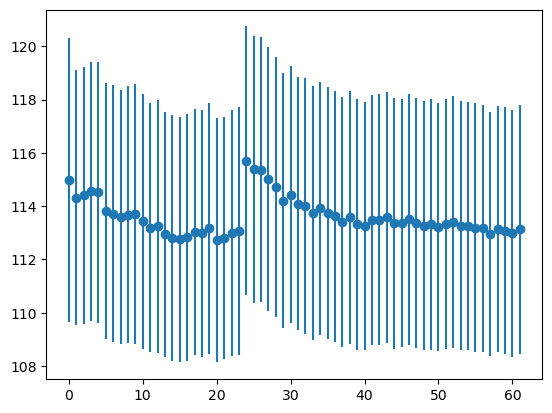

In [41]:
df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv', index_col=0)
mean_list = []
std_list = []
for idx, row in df.iterrows():
    data = gel[idx, row['Z']:row['Z']+r_size, row['Y']:row['Y']+y_gap, row['X']:row['X']+r_size]
    mean_list.append(np.nanmean(data))
    std_list.append(np.nanstd(data))
plt.errorbar(np.arange(len(mean_list)), mean_list, yerr=std_list, fmt='o')
plt.show()


In [16]:
np.vstack(rect_data)


array([[ 37,   0, 373],
       [ 65,   0, 358],
       [ 48,   0, 338],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0